# Libraries

In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pycountry
import seaborn as sns
from matplotlib.lines import Line2D 

In [18]:
indi1 = pd.read_csv('../data/unicef_indicator_1.csv')
indi2 = pd.read_csv('../data/unicef_indicator_2.csv')

In [19]:
indi1.head()

,country,alpha_2_code,alpha_3_code,numeric_code,indicator,time_period,obs_value,sex
0,Afghanistan,AF,AFG,4,Exclusively Breastfed for the First Two Days A...,2015,55.3,Female
1,Afghanistan,AF,AFG,4,Exclusively Breastfed for the First Two Days A...,2022,61.7,Female
2,Afghanistan,AF,AFG,4,Exclusively Breastfed for the First Two Days A...,2015,53.3,Male
3,Afghanistan,AF,AFG,4,Exclusively Breastfed for the First Two Days A...,2022,62.2,Male
4,Afghanistan,AF,AFG,4,Exclusively Breastfed for the First Two Days A...,2015,54.3,Total


In [20]:
indi2.head()

,country,alpha_2_code,alpha_3_code,numeric_code,indicator,time_period,obs_value,sex,unit_multiplier,unit_of_measure,observation_status,observation_confidentaility,time_period_activity_related_to_when_the_data_are_collected,current_age
0,Afghanistan,AF,AFG,4,Proportion of population using improved sanita...,2000,26.466161,Total,NaN,%,NaN,NaN,NaN,Total
1,Afghanistan,AF,AFG,4,Proportion of population using improved sanita...,2001,26.488067,Total,NaN,%,NaN,NaN,NaN,Total
2,Afghanistan,AF,AFG,4,Proportion of population using improved sanita...,2002,28.414983,Total,NaN,%,NaN,NaN,NaN,Total
3,Afghanistan,AF,AFG,4,Proportion of population using improved sanita...,2003,30.342781,Total,NaN,%,NaN,NaN,NaN,Total
4,Afghanistan,AF,AFG,4,Proportion of population using improved sanita...,2004,32.285490,Total,NaN,%,NaN,NaN,NaN,Total


In [21]:
indi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       741 non-null    object 
 1   alpha_2_code  735 non-null    object 
 2   alpha_3_code  741 non-null    object 
 3   numeric_code  741 non-null    int64  
 4   indicator     741 non-null    object 
 5   time_period   741 non-null    int64  
 6   obs_value     741 non-null    float64
 7   sex           741 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 46.4+ KB


In [22]:
indi2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 14 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   country                                                      5033 non-null   object 
 1   alpha_2_code                                                 5010 non-null   object 
 2   alpha_3_code                                                 5033 non-null   object 
 3   numeric_code                                                 5033 non-null   int64  
 4   indicator                                                    5033 non-null   object 
 5   time_period                                                  5033 non-null   int64  
 6   obs_value                                                    5033 non-null   float64
 7   sex                                                          5033 non-null   o

In [ ]:
breastfeeding_data = indi1[['country', 'time_period', 'obs_value']]

breastfeeding_data = breastfeeding_data[(breastfeeding_data['time_period'] >= 2000) & (breastfeeding_data['time_period'] <= 2022)]

breastfeeding_latest = breastfeeding_data.sort_values(['country', 'time_period'], ascending=[True, False]).drop_duplicates('country')

def get_country_name(name):
    try:
        return pycountry.countries.lookup(name).name
    except LookupError:
        return name

breastfeeding_latest['country_standardized'] = breastfeeding_latest['country'].apply(get_country_name)


In [33]:
world = gpd.read_file('../data/shapefiles/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

Missing countries after merge: ['Tanzania', 'W. Sahara', 'Canada', 'United States of America', 'Argentina', 'Chile', 'Dem. Rep. Congo', 'Somalia', 'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway', 'Greenland', 'Fr. S. Antarctic Lands', 'Brazil', 'Bolivia', 'Venezuela', 'France', 'Ecuador', 'Puerto Rico', 'Botswana', "Côte d'Ivoire", 'Central African Rep.', 'Eq. Guinea', 'eSwatini', 'Israel', 'Lebanon', 'Palestine', 'United Arab Emirates', 'Kuwait', 'Oman', 'Vanuatu', 'Laos', 'Vietnam', 'North Korea', 'South Korea', 'Iran', 'Syria', 'Sweden', 'Poland', 'Austria', 'Hungary', 'Moldova', 'Romania', 'Lithuania', 'Latvia', 'Estonia', 'Germany', 'Bulgaria', 'Greece', 'Croatia', 'Switzerland', 'Luxembourg', 'Belgium', 'Netherlands', 'Portugal', 'Spain', 'Ireland', 'New Caledonia', 'Solomon Is.', 'New Zealand', 'Australia', 'Sri Lanka', 'China', 'Taiwan', 'Italy', 'Denmark', 'United Kingdom', 'Iceland', 'Malaysia', 'Brunei', 'Slovenia', 'Finland', 'Slovakia', 'Czechia', 'Eritrea'

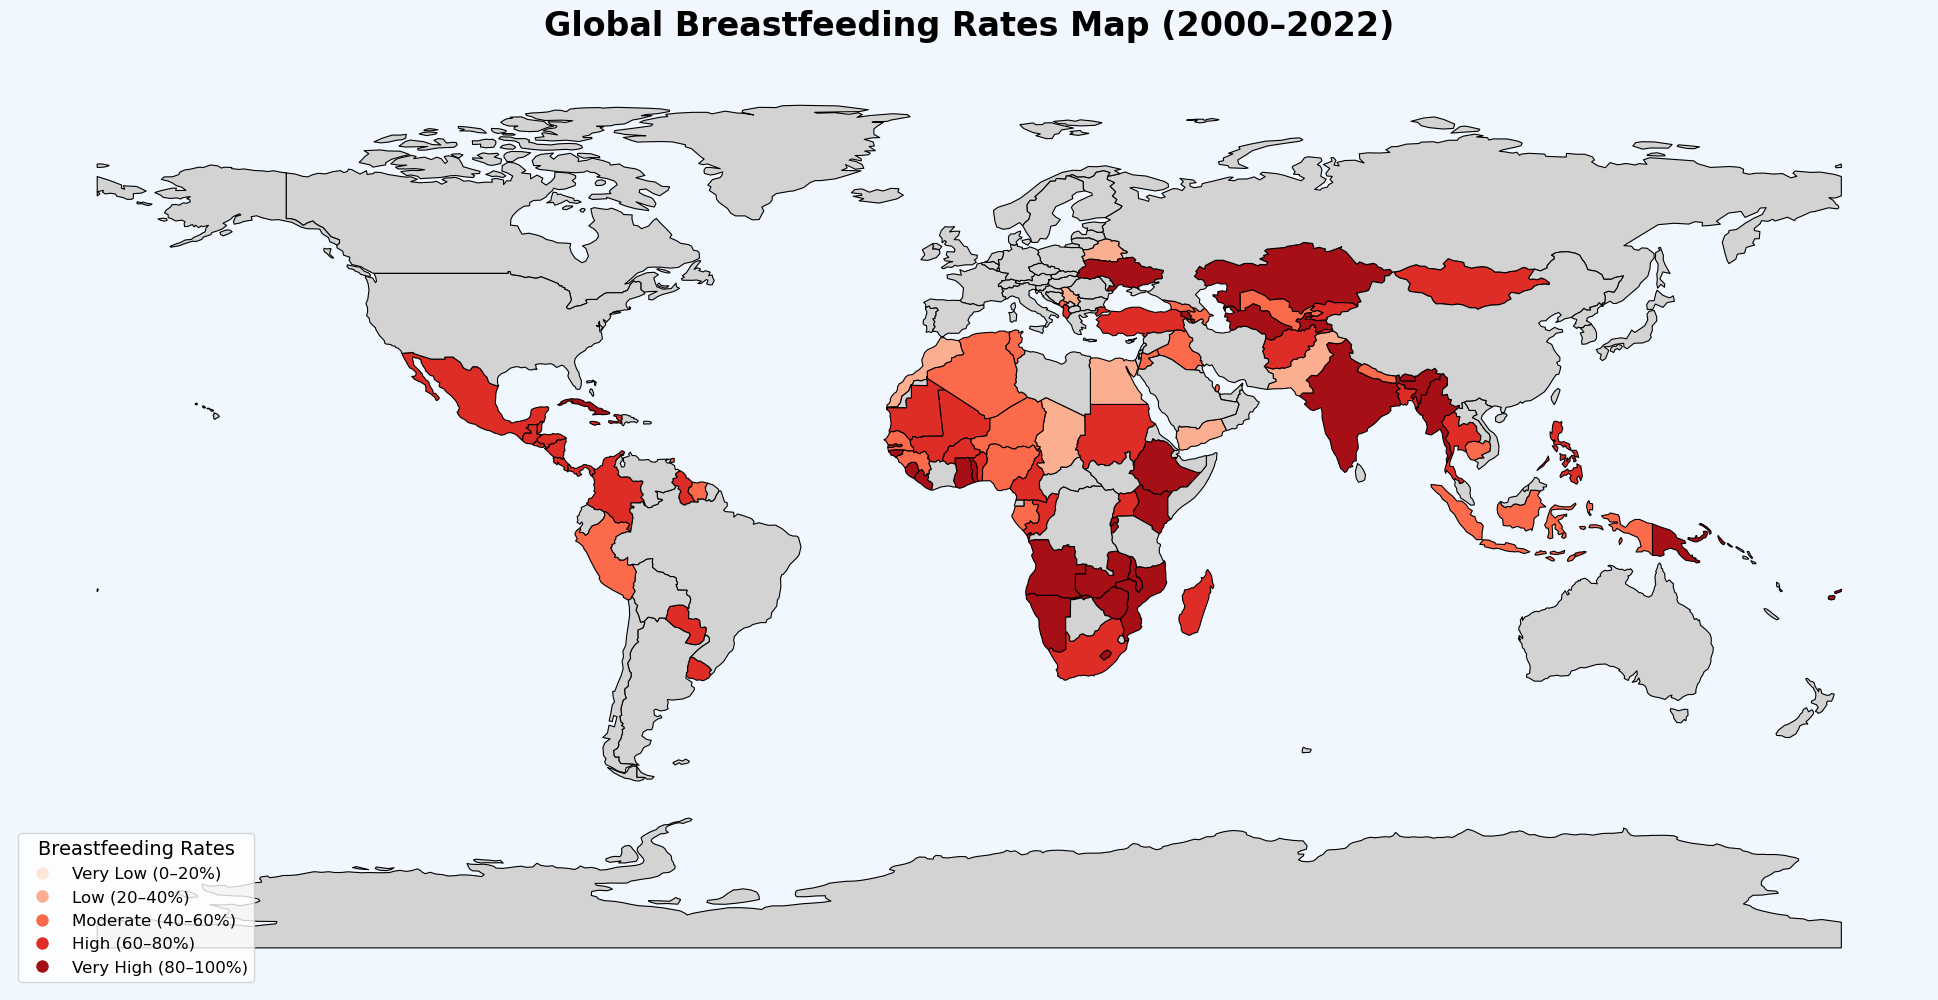

In [36]:
merged = world.merge(breastfeeding_latest, how="left", left_on="NAME", right_on="country_standardized")

missing = merged[merged['obs_value'].isna()]
print("Missing countries after merge:", missing['NAME'].tolist())

bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low (0–20%)', 'Low (20–40%)', 'Moderate (40–60%)', 'High (60–80%)', 'Very High (80–100%)']

merged['breastfeeding_bin'] = pd.cut(merged['obs_value'], bins=bins, labels=labels)

colors = ['#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15']  # color palette
cmap = mcolors.ListedColormap(colors)

bin_to_color = dict(zip(labels, range(len(labels))))
merged['bin_idx'] = merged['breastfeeding_bin'].map(bin_to_color)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

fig.patch.set_facecolor('#f0f7ff') 
ax.set_facecolor('#f0f7ff')

merged.plot(
    column='bin_idx',
    cmap=cmap,
    linewidth=0.8,
    edgecolor='black',
    ax=ax,
    legend=False,
    missing_kwds={"color": "lightgrey", "label": "Missing Data"}
)

legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                          markerfacecolor=color, markersize=10) for label, color in zip(labels, colors)]
ax.legend(handles=legend_elements, title="Breastfeeding Rates", loc='lower left', fontsize=12, title_fontsize=14)

ax.set_title('Global Breastfeeding Rates Map (2000–2022)', fontdict={'fontsize': 24, 'fontweight': 'bold'}, pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

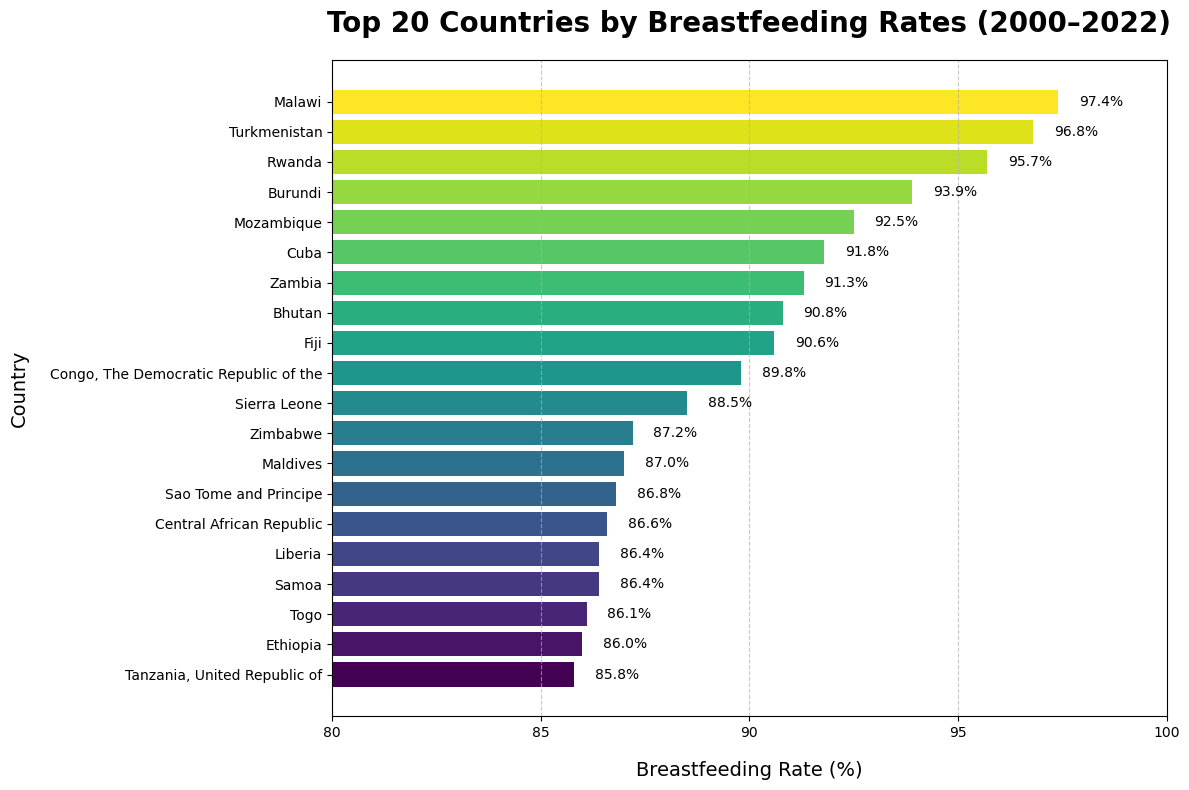

In [39]:
top_countries = breastfeeding_latest.sort_values(by='obs_value', ascending=False).head(20)

plt.figure(figsize=(12, 8))
bars = plt.barh(
    top_countries['country_standardized'],
    top_countries['obs_value'],
    color=plt.cm.viridis_r(np.linspace(0, 1, len(top_countries)))
)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5, 
        bar.get_y() + bar.get_height()/2,
        f'{width:.1f}%',
        va='center',
        ha='left',
        fontsize=10
    )

plt.title('Top 20 Countries by Breastfeeding Rates (2000–2022)', fontsize=20, weight='bold', pad=20)
plt.xlabel('Breastfeeding Rate (%)', fontsize=14, labelpad=15)
plt.ylabel('Country', fontsize=14, labelpad=15)

plt.xlim(80, 100)
plt.xticks(np.arange(80, 101, 5))

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

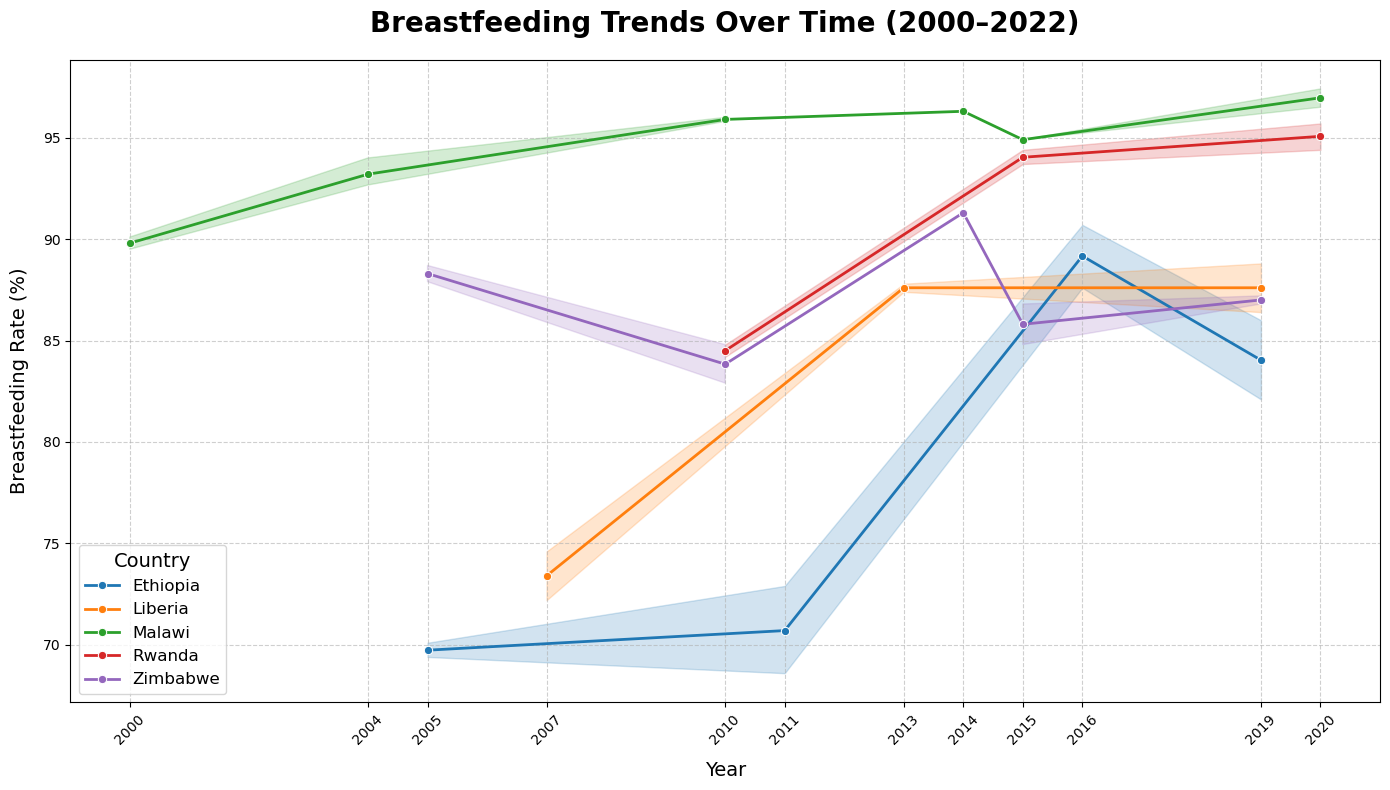

In [ ]:
selected_countries = ['Malawi', 'Rwanda', 'Ethiopia','Zimbabwe', 'Liberia']

trend_data = breastfeeding_data[
    breastfeeding_data['country'].isin(selected_countries)
]

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=trend_data,
    x='time_period',
    y='obs_value',
    hue='country',
    marker='o',
    linewidth=2       
)

plt.title('Breastfeeding Trends Over Time (2000–2022)', fontsize=20, weight='bold', pad=20)
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Breastfeeding Rate (%)', fontsize=14, labelpad=10)

plt.xticks(sorted(trend_data['time_period'].unique()), rotation=45)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Country', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()

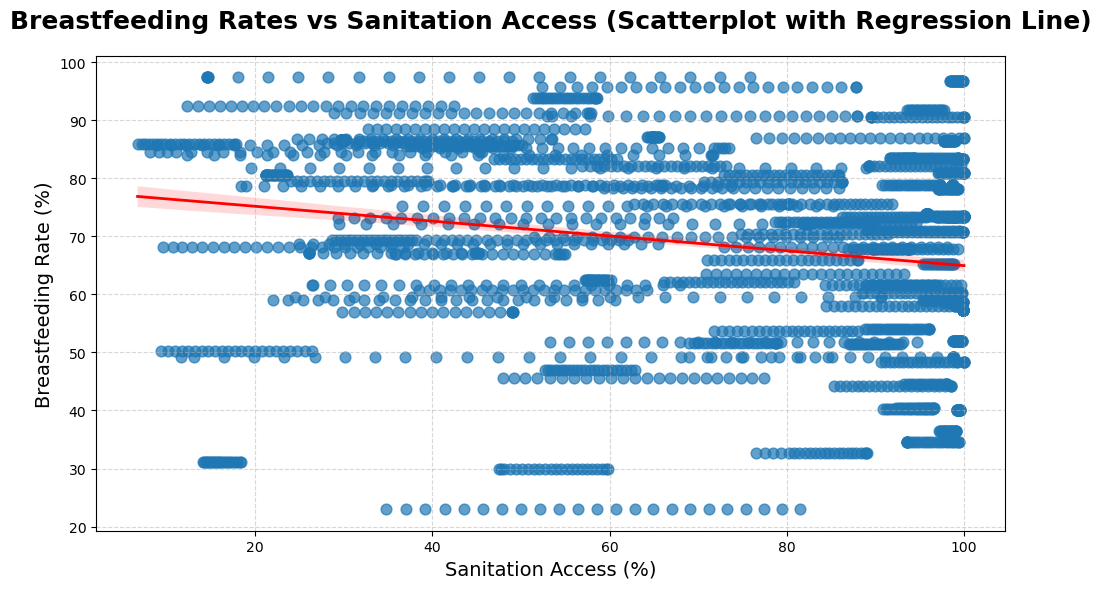

In [ ]:
merged_data = pd.merge(
    breastfeeding_latest[['country_standardized', 'obs_value']],
    indi2[['country', 'obs_value']],
    how='inner',
    left_on='country_standardized',
    right_on='country'
)

merged_data = merged_data.rename(columns={
    'obs_value_x': 'Breastfeeding Rate (%)',
    'obs_value_y': 'Sanitation Access (%)'
})

merged_data = merged_data.dropna()

plt.figure(figsize=(10, 6))

sns.regplot(
    data=merged_data,
    x='Sanitation Access (%)',
    y='Breastfeeding Rate (%)',
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title('Breastfeeding Rates vs Sanitation Access (Scatterplot with Regression Line)', fontsize=18, weight='bold', pad=20)
plt.xlabel('Sanitation Access (%)', fontsize=14)
plt.ylabel('Breastfeeding Rate (%)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
